<a href="https://colab.research.google.com/github/gagomezuribe/03MIAR--Algoritmos-de-Optimizacion/blob/main/Gustavo_Gomez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Gustavo Gómez <br>
Link:   https://colab.research.google.com/drive/1UoOb_QfReDAsK3lLroRGOwBEpf876f_B?usp=sharing <br>

Github: https://github.com/gagomezuribe/03MIAR--Algoritmos-de-Optimizacion.git<br>




In [ ]:
import math
import pdb
import numpy as np

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

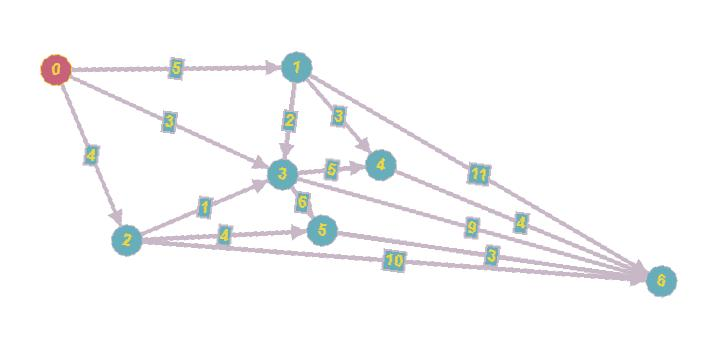

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):

  if desde == RUTA[desde][hasta]:
    lista_ruta.append(desde)
    return
  else:
    lista_ruta.append(RUTA[desde][hasta])
    calcular_ruta(RUTA, desde, RUTA[desde][hasta])

    return

global lista_ruta
lista_ruta = []

desde,hasta=0,6
print("\nLa ruta es:")

lista_ruta.append(hasta)
calcular_ruta(RUTA, desde,hasta)
# lista_ruta = lista_ruta.reverse()
lista_ruta.reverse()
print(lista_ruta)



La ruta es:
[0, 2, 5, 6]


##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

# CI((0,1),COSTES)

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)

  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  print(MEJOR_SOLUCION)
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )
  print(CI( (),COSTES))
  print(NODOS)
  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    # print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]
    # print("HIJOS")

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )






# PARTE OPCIONAL: MODELADO CON DIMENSIONES MAYORES

In [ ]:
n=5
arr = np.random.randint(10,40,(n,n))
COSTES = arr.tolist()
print(COSTES)
# COSTES=[[11,12,18,40],
#         [14,15,13,22],
#         [11,17,19,23],
#         [17,14,20,28]]
%time ramificacion_y_poda(COSTES)





[[16, 23, 28, 25, 38], [21, 14, 20, 19, 13], [25, 18, 11, 31, 27], [25, 38, 35, 15, 17], [12, 33, 17, 11, 17]]
(0, 1, 2, 3, 4)
Cota Superior: 73
61
[{'s': (), 'ci': 61}]
Nodo prometedor: ()
HIJOS
Nodo prometedor: (0,)
HIJOS
Nodo prometedor: (0, 4)
HIJOS
Nodo prometedor: (0, 4, 2)
HIJOS
Nodo prometedor: (0, 1)
HIJOS
Nodo prometedor: (0, 1, 2)
HIJOS
Nodo prometedor: (1,)
HIJOS
Nodo prometedor: (0, 4, 2, 3)
HIJOS
La solucion final es: (0, 1, 2, 3, 4)  en  8  iteraciones  para dimension:  5
CPU times: user 3.53 ms, sys: 4 µs, total: 3.53 ms
Wall time: 4.83 ms



Se hicieron varias ejecucione para un tamaño de entrada diferente para analizar el tiempo de ejecución en una CPU de Google Colab. Los resultados fueron los siguientes:

n=4: 1,72ms

n=5: 4,8ms

n=8: 1,08s

n=10: 6,1s

n=12: 57,2s

Con n=16 no finalizó luego de más de 1 hora en ejecución.

El tiempo aumenta exponencialmente X^n, por lo que el algoritmo determinístico de ramificacion y poda es una solución viable para valores de n bajos, por ejemplo menor a 12 elementos. El algoritmo de fuerza bruta realiza más operaciones por lo que no es una opción tampoco para valores de n mayores a estos niveles de referencia (que dependen del tiempo con que se cuente y la capacidad de cómputo disponible)

Para valores mayores de n se hace neceario el empleo de técnicas heurísticas.




##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random
import time


Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

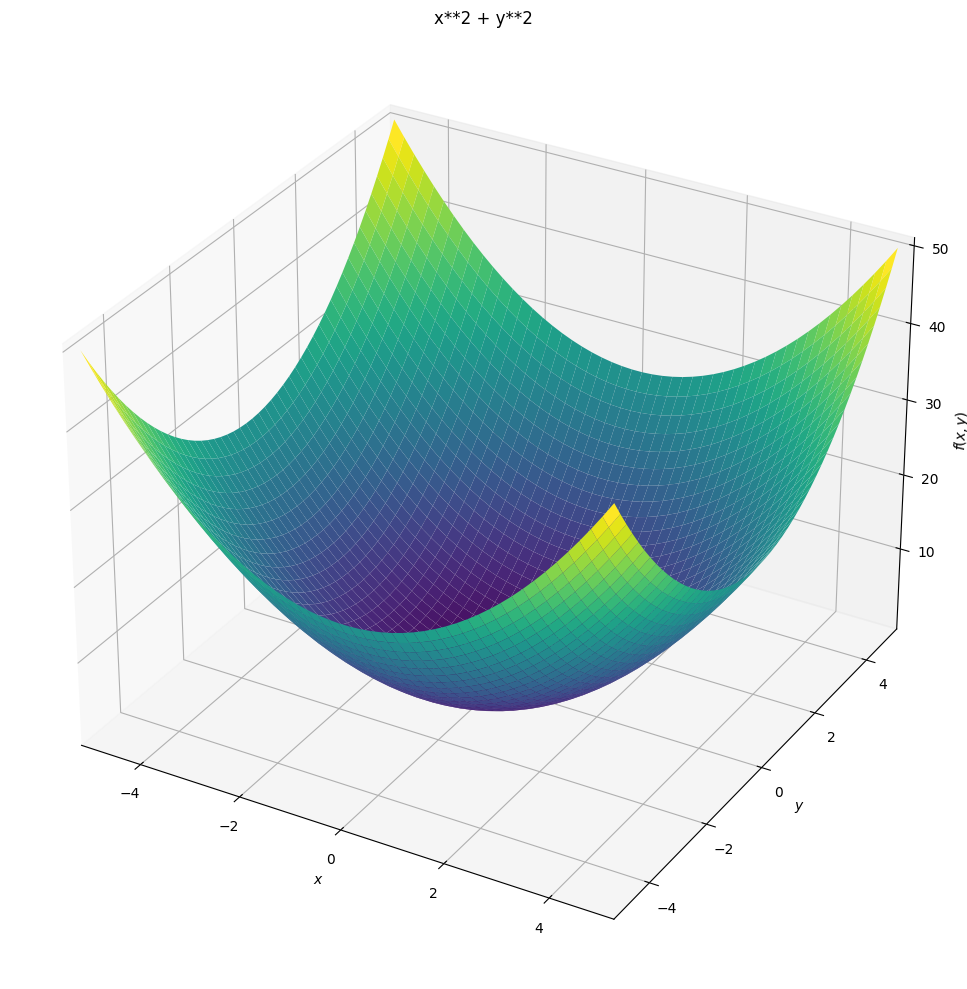

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

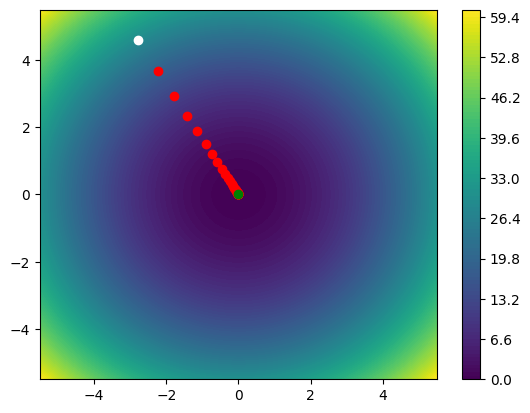

Solucion: [-3.965029374751237e-05, 6.551836825234583e-05] 5.864802372714017e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")


#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
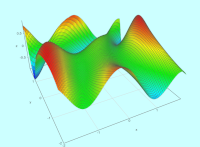


# PARTE ADICIONAL OPCIONAL

In [ ]:
#Definimos la funcion
f2= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
h=0.01
gradiente = lambda X: [(f2([X[0]+h,X[1]])-f2(X))/h  , (f2([X[0],X[1]+h])-f2(X))/h ]


   Px    Py       gr x      gr y2       f(x)
 1.00  0.00 |       1.04      -0.32 |       0.15
 0.95  0.02 |       0.87      -0.30 |       0.09
 0.90  0.03 |       0.71      -0.27 |       0.05
 0.87  0.04 |       0.58      -0.25 |       0.03
 0.84  0.06 |       0.47      -0.22 |       0.01
 0.82  0.07 |       0.39      -0.20 |      -0.00
 0.80  0.08 |       0.32      -0.19 |      -0.01
 0.78  0.09 |       0.26      -0.17 |      -0.02
 0.77  0.10 |       0.21      -0.16 |      -0.02
 0.76  0.10 |       0.17      -0.15 |      -0.02
 0.75  0.11 |       0.14      -0.14 |      -0.03
 0.74  0.12 |       0.11      -0.13 |      -0.03
 0.74  0.12 |       0.09      -0.12 |      -0.03
 0.73  0.13 |       0.07      -0.12 |      -0.03
 0.73  0.14 |       0.06      -0.11 |      -0.03
 0.73  0.14 |       0.04      -0.11 |      -0.03
 0.72  0.15 |       0.03      -0.11 |      -0.03
 0.72  0.15 |       0.02      -0.10 |      -0.03
 0.72  0.16 |       0.01      -0.10 |      -0.03
 0.72  0.16 |       0.01

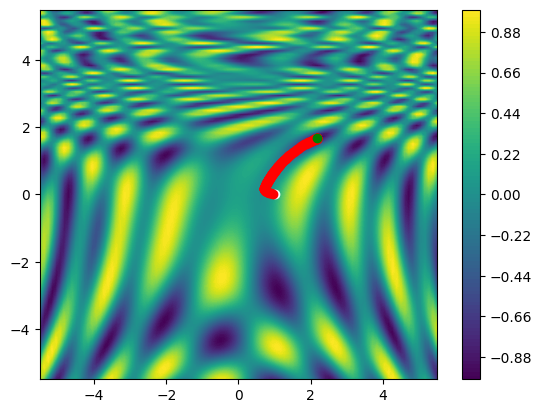

Solucion:encontrada; Iteraciones:  196 P:  2.17 2.17 f(P fin) -1.00


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f2([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
# P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
P=[1,0]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.05
umbral_fin = 0.01

#Iteraciones:500
encontrada, iteraciones = 'no encontrada',0
print("{0:>5} {1:>5} {2:>10} {3:>10} {4:>10}".format("Px","Py","gr x","gr y2","f(x)") )
for _ in range(500):
  grad = gradiente(P)
  print("{0:>5.2f} {1:>5.2f}".format(P[0],P[1]), end=' | ')
  print("{0:>10.2f} {1:>10.2f}".format(grad[0],grad[1]), end=' | ')
  print("{0:>10.2f}".format(f2(P)))
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")
  iteraciones+=1
  if abs(grad[0])+abs(grad[1]) < umbral_fin:
    encontrada = 'encontrada'
    break



#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" + encontrada + "; Iteraciones: ", end=' ')
print(iteraciones, "P: ", "{0:.2f} {0:.2f}".format(P[0],P[1]), "f(P fin)", "{:.2f}".format(f(P)))